In [2]:
import pandas as pd

In [4]:
#Series de pandas
numeros = [3, 4, 5, 6, 7]
serie = pd.Series(numeros)
serie, type(serie)


(0    3
 1    4
 2    5
 3    6
 4    7
 dtype: int64,
 pandas.core.series.Series)

In [5]:
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad" : [22, 25, 28, 23, 20],
    "Ciudad" : ["Barcelona", "Madrid", "Valencia", "Sevilla", "Bilbao"]
}
data, type(data)

({'Nombre': ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
  'Edad': [22, 25, 28, 23, 20],
  'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Bilbao']},
 dict)

In [7]:
#Generar un dataframe apartir de un diccionario
df = pd.DataFrame(data=data)
df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilbao


In [9]:
#Exportar datafram
df.to_csv("data.csv")

In [12]:
#Importar un dataframe
import_df = pd.read_csv("data.csv", index_col=0)
import_df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilbao


In [14]:
nombres = df["Nombre"]
print(nombres, type(nombres))

0      Ana
1     Juan
2    Pedro
3    Maria
4     Luis
Name: Nombre, dtype: object <class 'pandas.core.series.Series'>


In [18]:
#Seleccionar una o mas columnas
df[["Nombre", "Edad"]]

,Nombre,Edad
0,Ana,22
1,Juan,25
2,Pedro,28
3,Maria,23
4,Luis,20


In [22]:
#Filtrar por indice
fila = df.loc[2] 
fila

Nombre       Pedro
Edad            28
Ciudad    Valencia
Name: 2, dtype: object

In [25]:
#Filtrar por condiciones
df[df["Edad"]>23]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [28]:
#Filtar po
filtro = (df["Edad"] > 23) & (df["Nombre"].str.startswith("P"))
df[filtro]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia


In [29]:
#Filtrar por query
df.query("Edad < 23")

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilbao


In [32]:
df[df["Nombre"].isin(["Ana", "Carlos", "Luis"])]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilbao


In [34]:
def longitud_5(nombre):
    return len(nombre) == 5
df[df["Nombre"].apply(longitud_5)]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia
3,Maria,23,Sevilla


In [35]:
#Filtrar por edades entre 25 y 35 años

df[df["Edad"].between(25,35)]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [36]:
import numpy as np

In [38]:
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad" : [22, 25, np.nan, 23, 20],
    "Ciudad" : ["Barcelona", "Madrid", "Valencia", None, "Bilbao"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [43]:
#Rellenar valores faltantes
df_fill = df.fillna({
    "Edad" : df["Edad"].mean(),
    "Ciudad" : "Desconocido"
})
df_fill

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,22.5,Valencia
3,Maria,23.0,Desconocido
4,Luis,20.0,Bilbao


In [44]:
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
4,Luis,20.0,Bilbao


In [47]:
# Reemplazar valores especificos de una columna
df_reem = df.replace({
    "Ciudad" : {None: "Desconocido"}
})
df_reem

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,Desconocido
4,Luis,20.0,Bilbao


In [48]:
#Interpolar valores
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,24.0,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [50]:
data_duplicada = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis", "Ana", "Juan"],
    "Edad" : [22, 25, np.nan, 23, 20, 22, 25],
    "Ciudad" : ["Barcelona", "Madrid", "Valencia", None, "Bilbao", "Barcelona", "Madrid"]
}
df_duplicado = pd.DataFrame(data_duplicada)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao
5,Ana,22.0,Barcelona
6,Juan,25.0,Madrid


In [52]:
df_sin_duplicados = df_duplicado.drop_duplicates()
df_sin_duplicados

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [53]:
#Renombrar columnas
df_renombrado = df.rename(columns={"Nombre":"Name", "Edad":"Age", "Ciudad":"City"})
df_renombrado

,Name,Age,City
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [55]:
#Ordenar columnas
columnas_ordenadas = ["Ciudad", "Edad", "Nombre"]
df_ordenado = df[columnas_ordenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Barcelona,22.0,Ana
1,Madrid,25.0,Juan
2,Valencia,NaN,Pedro
3,None,23.0,Maria
4,Bilbao,20.0,Luis


In [56]:
#Transformacion de datos
def cuadrado(x):
    return x**2

df["Edad cuadrado"] = df["Edad"].apply(cuadrado)
df

,Nombre,Edad,Ciudad,Edad cuadrado
0,Ana,22.0,Barcelona,484.0
1,Juan,25.0,Madrid,625.0
2,Pedro,NaN,Valencia,NaN
3,Maria,23.0,None,529.0
4,Luis,20.0,Bilbao,400.0


In [62]:
data = {'Nombre': ['Juan', 'Ana', 'Luis', 'Laura', 'Pedro', 'Carla'],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia', 'Barcelona', 'Madrid'],
    'Edad': [25, 33, 38, 28, 45, 38],
    'Puntuación': [80, 90, 85, 88, 75, 91]
}
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuación
0,Juan,Madrid,25,80
1,Ana,Barcelona,33,90
2,Luis,Madrid,38,85
3,Laura,Valencia,28,88
4,Pedro,Barcelona,45,75
5,Carla,Madrid,38,91


In [64]:
#Agrupar datos pro ciudad
grouper = df.groupby("Ciudad")
print(grouper.groups)

{'Barcelona': [1, 4], 'Madrid': [0, 2, 5], 'Valencia': [3]}


In [69]:
#Calcular suma de edades y puntuaciones por ciudad

aggregated_data = grouper.agg(
    {
        "Edad":"mean",
        "Puntuación":"sum"
    }
)
aggregated_data

,Edad,Puntuación
Ciudad,,
Barcelona,39.000000,165
Madrid,33.666667,256
Valencia,28.000000,88


In [71]:
# Definir funcion de agregacion personalizada
def rango(series):
    return series.max() - series.min()

aggregated_data_custom = grouper.agg(
    {
        "Edad": rango,
        "Puntuación": rango
    }
)
aggregated_data_custom

,Edad,Puntuación
Ciudad,,
Barcelona,12,15
Madrid,13,11
Valencia,0,0


In [72]:
#Agregacion y Agrupacion Multinvel
data["Categoria"] = ["A", "B", "A", "B", "A", "B"]
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuación,Categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,B
2,Luis,Madrid,38,85,A
3,Laura,Valencia,28,88,B
4,Pedro,Barcelona,45,75,A
5,Carla,Madrid,38,91,B


In [73]:
#Agrupar datos por ciudad y categoria
grouper_multi = df.groupby(["Ciudad", "Categoria"])
grouper_multi.groups

{('Barcelona', 'A'): [4], ('Barcelona', 'B'): [1], ('Madrid', 'A'): [0, 2], ('Madrid', 'B'): [5], ('Valencia', 'B'): [3]}

In [74]:
#Calcular suma de edades y puntuacion por ciudad y categoria
aggregated_data_multi = grouper_multi.agg(
    {
        "Edad":"sum",
        "Puntuación":"mean"
    }
)
aggregated_data_multi

Edad  Puntuación
Ciudad    Categoria                  
Barcelona A            45        75.0
          B            33        90.0
Madrid    A            63        82.5
          B            38        91.0
Valencia  B            28        88.0

In [77]:
#Agregar nuevos datos a un DATAFRAME
# Crear un dataframe  de ejemplo
data = {
    'Nombre' : ['Juan', 'Ana', 'Luis', 'Laura'],
    'Edad' : [22, 33, 30, 28]
}
df = pd.DataFrame(data)
df

,Nombre,Edad
0,Juan,22
1,Ana,33
2,Luis,30
3,Laura,28


In [78]:
#Agregar columna
df["Ciudad"] = ["Madrid", "Barcelona", "Madrid", "Valencia"]
df

,Nombre,Edad,Ciudad
0,Juan,22,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [81]:
#INSERTAR UNA FILA con metodo concat
new_row = pd.Series(
    {
        "Nombre" : "Pedro",
        "Edad": 45,
        "Ciudad": "Barcelona"
    }
)
df = pd.concat([df, new_row.to_frame().T], ignore_index= True)
df

,Nombre,Edad,Ciudad
0,Juan,22,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Pedro,45,Barcelona


In [91]:
#COMBINANDO DATAFRAMES
# Crear un dataframe  de ejemplo
data = {
    'Nombre' : ['Juan', 'Ana', 'Luis', 'Laura'],
    'Edad' : [22, 33, 30, 28],
}

df1 = pd.DataFrame(data)
df1["Ciudad"] = ["Madrid", "Barcelona", "Madrid", "Valencia"]

# Crear un segundo datagrame ejemplo:
data2 = {
    'Nombre' : ['Carla', 'Irene'],
    'Edad' : [38, 27],
    'Ciudad' : ['Madrid', 'Bilbao']
}
df2 = pd.DataFrame(data2)


In [92]:
df1

,Nombre,Edad,Ciudad
0,Juan,22,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [93]:
df2

,Nombre,Edad,Ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [95]:
df_combined = pd.concat([df1,df2], ignore_index= True)
df_combined

,Nombre,Edad,Ciudad
0,Juan,22,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Carla,38,Madrid
5,Irene,27,Bilbao


In [96]:
import numpy as np

In [100]:
#Crear arreglo de 1 dimension con 5 elementos
arr1 = np.array([1,2,3,4,5,6])
print("Arreglo ID", arr1)
print("Form(shape)", arr1.shape)
print("Tipo de datos (dtyype)", arr1.dtype)

Arreglo ID [1 2 3 4 5 6]
Form(shape) (6,)
Tipo de datos (dtyype) int64


In [101]:
#Cambiar la aforma del arreglo a una matriz de 2x3
arr2 = arr1.reshape((2,3))
print("Arreglo 2D\n", arr2)
print("Form(shape)\n", arr2.shape)
print("Tipo de datos (dtyype)\n", arr2.dtype)


Arreglo 2D
 [[1 2 3]
 [4 5 6]]
Form(shape)
 (2, 3)
Tipo de datos (dtyype)
 int64


In [103]:
#Crear una matriz con forma (4,4) con numeros aleatorios entre 0 y 1
matriz = np.random.rand(4,4)
print("Arreglo ID", matriz)
print("Form(shape)", matriz.shape)
print("Tipo de datos (dtyype)", matriz.dtype)

Arreglo ID [[0.44386153 0.49000577 0.56168554 0.86679303]
 [0.50197386 0.4035784  0.77759355 0.2285107 ]
 [0.7680023  0.66487927 0.43387779 0.59933363]
 [0.32297003 0.93806116 0.79221126 0.76606666]]
Form(shape) (4, 4)
Tipo de datos (dtyype) float64


In [104]:
#Numpy : Manipulacion de dato
#Crear un arreglo de 2 dimensiones ap artir de una lista de listas
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr, type(arr))

[[1 2 3]
 [4 5 6]
 [7 8 9]] <class 'numpy.ndarray'>


In [105]:
arr = np.zeros((3,4))
print(arr)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [106]:
arr = np.ones((2,2))
print(arr)

[[1. 1.]
 [1. 1.]]


In [107]:
#Crear matriz identidad
arr = np.eye(4)
print(arr)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [110]:
#Crear un arreglo 3d de ceros con forma (2,3,4)
arr = np.zeros((2,3,4))
arr[0,1,2] = 10
print(arr)

[[[ 0.  0.  0.  0.]
  [ 0.  0. 10.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]


In [111]:
arr = np.random.rand(2,5)
arr

array([[0.86138984, 0.86449377, 0.05087275, 0.33269098, 0.58281963],
       [0.0809701 , 0.68811953, 0.82605467, 0.29441239, 0.57519784]])

In [112]:
arr.T

array([[0.86138984, 0.0809701 ],
       [0.86449377, 0.68811953],
       [0.05087275, 0.82605467],
       [0.33269098, 0.29441239],
       [0.58281963, 0.57519784]])

In [115]:
arr1 = np.array([[1,2], [3,4]])
arr2 = np.array([[5,6],[7,8]])
arr1, arr2

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [116]:
#CONCATENAR ARERGLOS HORIZONTALEMENTE
arr_h = np.hstack((arr1,arr2))
arr_h

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [117]:
#CONCATENAR ARERGLOS VERTICALMENTE
arr_v = np.vstack((arr1, arr2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [118]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [120]:
suma = np.sum(arr)
suma

np.int64(15)

In [121]:
promedio = np.mean(arr)
promedio

np.float64(3.0)

In [122]:
mediana = np.median(arr)
mediana

np.float64(3.0)

In [123]:
producto = np.prod(arr)
producto

np.int64(120)

In [124]:
desv_est = np.std(arr)
desv_est

np.float64(1.4142135623730951)

In [126]:
var = np.var(arr)
var

np.float64(2.0)

In [127]:
minimo = np.min(arr)
minimo

np.int64(1)

In [128]:
maximo = np.max(arr)
maximo

np.int64(5)

In [130]:
cumsum= np.cumsum(arr)
cumsum

array([ 1,  3,  6, 10, 15])

In [131]:
#Suma element-wise
arr + arr

array([ 2,  4,  6,  8, 10])

In [132]:
#Resta element-wise
arr-arr

array([0, 0, 0, 0, 0])

In [133]:
arr*arr

array([ 1,  4,  9, 16, 25])

In [134]:
arr/arr

array([1., 1., 1., 1., 1.])

In [135]:
#INTEGRACION PANDAS Y NUMPY
import pandas as pd
import numpy as np

In [138]:
data = np.array([[1,2,3], [4,5,6], [7,8,9]])

#CREAR UN DATAFRAME A PARTIR DEL ARREGLO DE NUMPY
df = pd.DataFrame(data, columns=["A", "B","C"])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [139]:
 data = {
    "A": [1, 4, 7],
    "B": [2, 5, 8],
    "C": [3, 6, 9 ]
 }
df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [140]:
arr = df.to_numpy()
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [141]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [143]:
#CALCULAR PRMEDIO  DE CADA COLUMNA YSANDO NUMPY
mean_columns = np.mean(df, axis = 0)
mean_columns

A    4.0
B    5.0
C    6.0
dtype: float64

In [145]:
df.mean(axis=1)

0    2.0
1    5.0
2    8.0
dtype: float64

In [146]:
import matplotlib.pyplot as plt

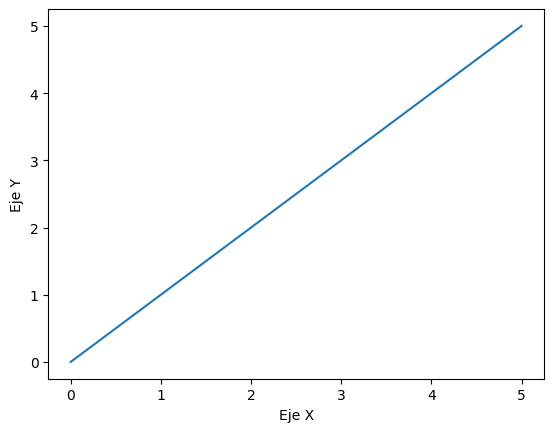

In [150]:
#EJEMPLO DE UNA LINEA SIMPLE
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.plot(x,y)
plt.show()


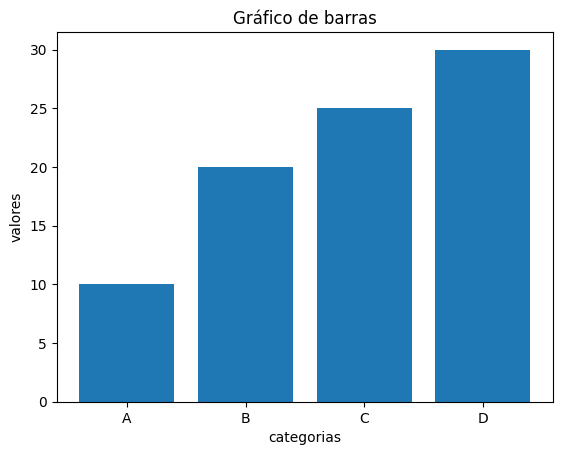

In [151]:
#GRÁFICO DE BARRAS
categorias = ["A", "B", "C", "D"]
valores = [10, 20, 25, 30]
plt.bar(categorias,valores)
plt.title("Gráfico de barras")
plt.xlabel("categorias")
plt.ylabel("valores")
plt.show()

In [153]:
plt.style.use("ggplot")
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

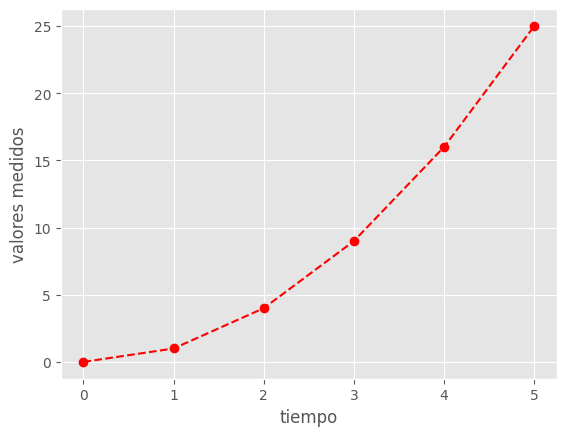

In [155]:
x=[0,1,2,3,4,5]
y=[0,1,4,9,16,25]
plt.plot(x,y, color = "red", linestyle="--", marker = "o")
plt.xlabel("tiempo")
plt.ylabel("valores medidos")
plt.show()

In [156]:
#SEABORN 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
#EJEMPLO GRAFICO DE DISPERSIÓN
data = sns.load_dataset("iris")
data, set(data["species"])


(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

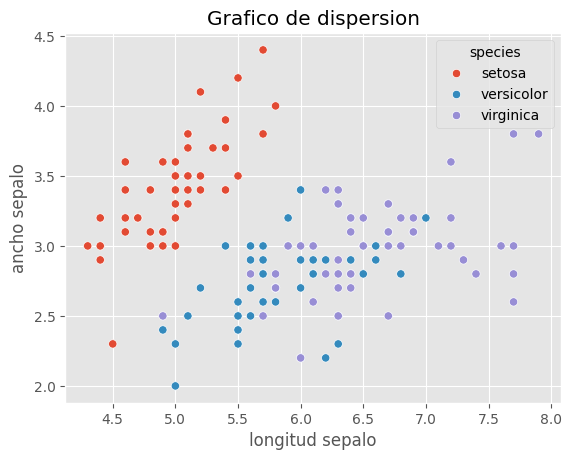

In [160]:
#GRAFICA DE DISPERSIÓN
sns.scatterplot(x ="sepal_length", y = "sepal_width", hue = "species", data=data)
plt.xlabel("longitud sepalo")
plt.ylabel("ancho sepalo")
plt.title("Grafico de dispersion")
plt.show()

Text(0.5, 1.0, 'Ridgeplot - Iris set')

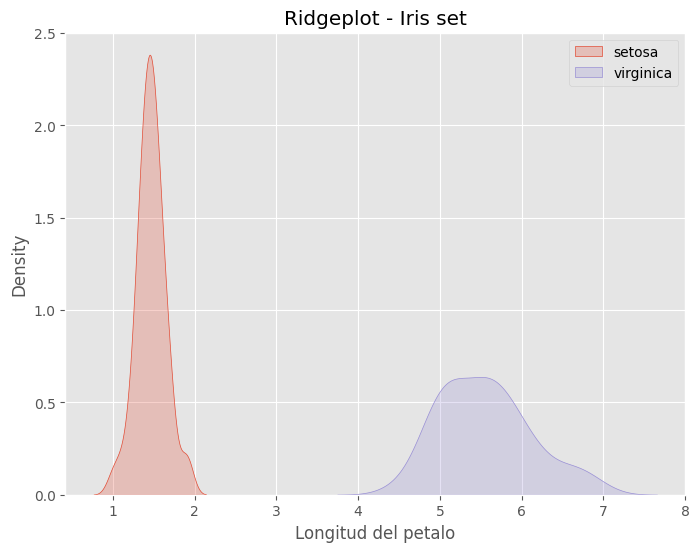

In [162]:
#Gradfica de RidgePlot
setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolo"]
virginica = data[data["species"] == "virginica"]

#Configurar figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel("Longitud del petalo")
#CREAR EL Ridgeplot usando kdeplot
sns.kdeplot(data=setosa["petal_length"], label="setosa", ax = ax, fill = True)
sns.kdeplot(data=versicolor["petal_length"], label="versicolor", ax = ax, fill = True)
sns.kdeplot(data=virginica["petal_length"], label="virginica", ax = ax, fill = True)

#Ajustar posición de las leyendas
ax.legend(loc="upper right")

plt.title("Ridgeplot - Iris set")

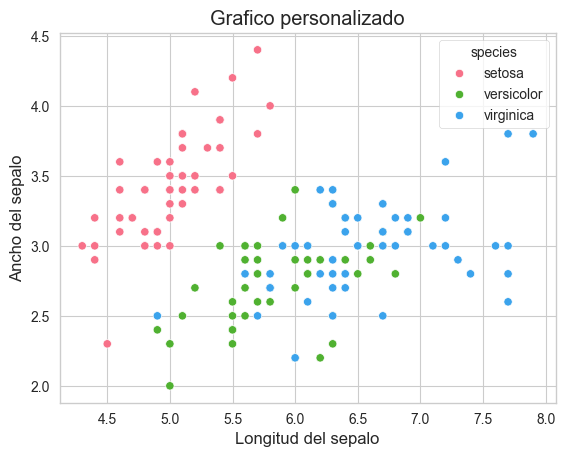

In [164]:
#GRAFICA DE DISPERSION
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)

sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data, palette=palette)
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")

plt.title("Grafico personalizado")
plt.show()

In [165]:
#GRAFICOS AVANZADOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
#GENERAR DATOS DE EJEMPLO
np.random.seed(42)
edad_autos = np.random.randint(0, 20, size=200)
precio_autos = 30 - edad_autos + np.random.normal(-3,3, size=200)

data = pd.DataFrame(
    {
        "edad" : edad_autos,
        "precio" : precio_autos
    }
)
data

,edad,precio
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


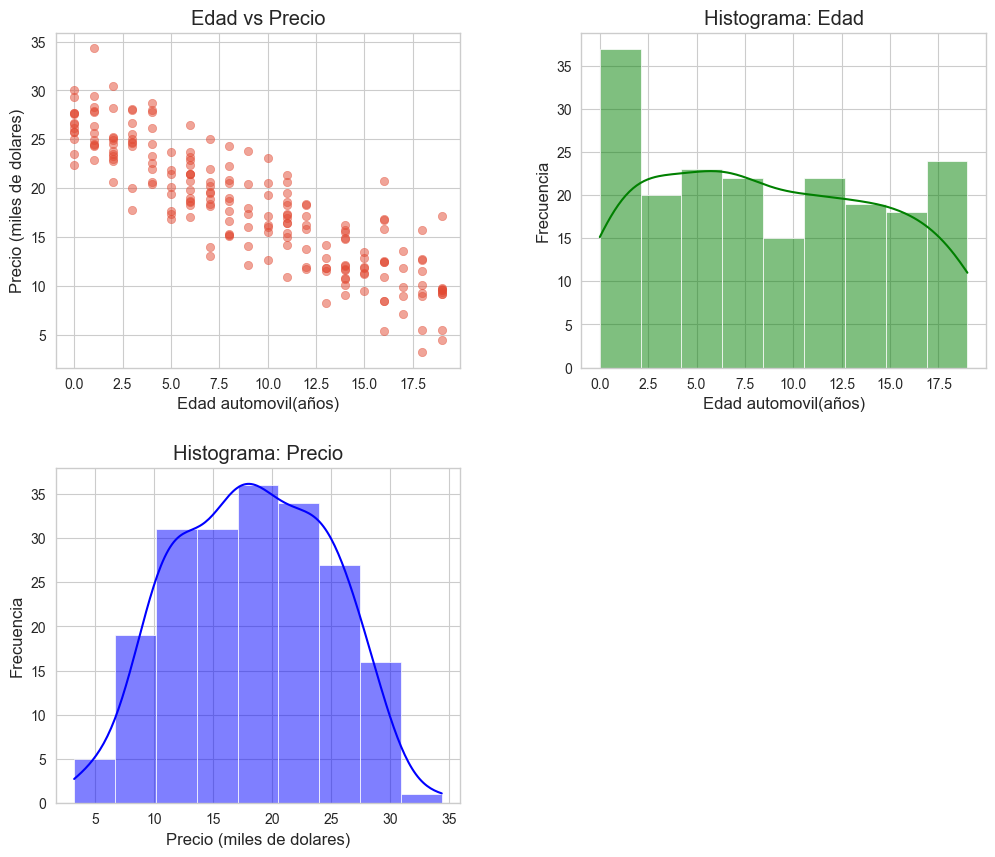

In [179]:
#Creación del gráfico
fig, ax = plt.subplots(2, 2, figsize=(12,10))

#Grafico dispersión de la edad
ax[0,0].scatter(data["edad"], data["precio"], alpha=0.5)
ax[0,0].set_xlabel("Edad automovil(años)")
ax[0,0].set_ylabel("Precio (miles de dolares)")
ax[0,0].set_title("Edad vs Precio")

#Histograma de la edad
sns.histplot(data["edad"], ax=ax[0,1], kde = True, color = "g")
ax[0,1].set_xlabel("Edad automovil(años)")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_title("Histograma: Edad")

#Histograma de precio
sns.histplot(data["precio"], ax=ax[1,0], kde = True, color = "b")
ax[1,0].set_xlabel("Precio (miles de dolares)")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_title("Histograma: Precio")
ax[1,1].axis("off")
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [196]:
#ANALISIS EXPLORATORIO Y UNIVARIADO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [197]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


[]

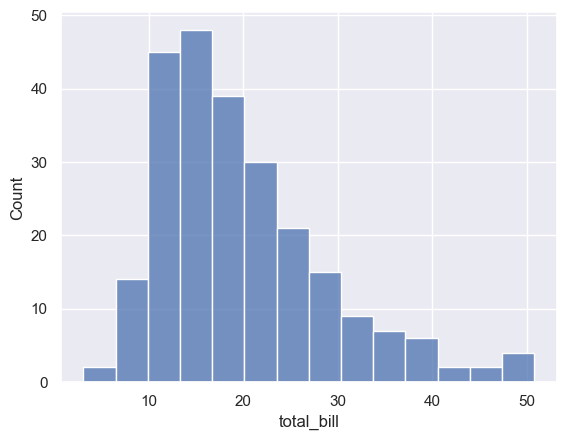

In [188]:
#ANALISIS UNIVARIADO
sns.histplot(data=df, x="total_bill")
plt.plot()

[]

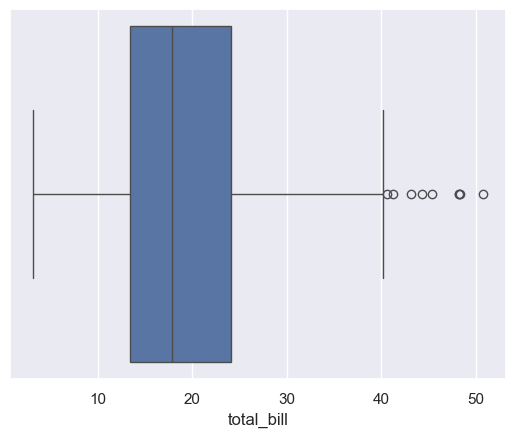

In [198]:
sns.boxplot(data=df, x="total_bill")
plt.plot()

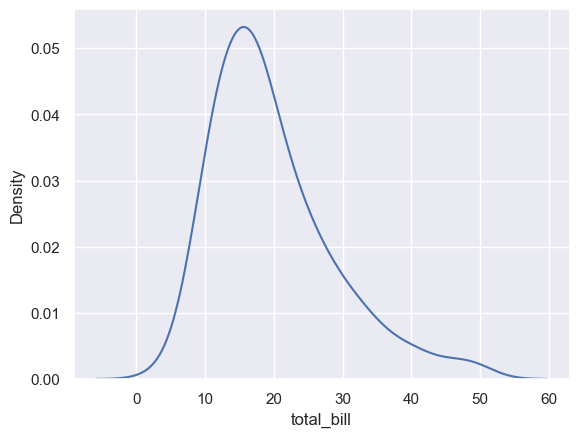

In [199]:
sns.kdeplot(data=df, x="total_bill")
plt.show()


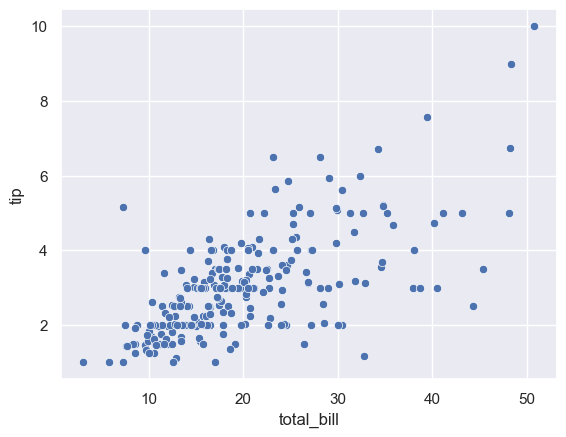

In [200]:
#ANALISIS BIVARIADO
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.show()


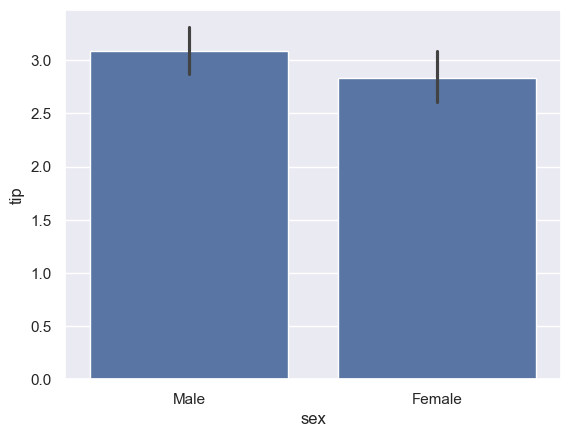

In [201]:
sns.barplot(data=df, x="sex", y="tip")
plt.show()

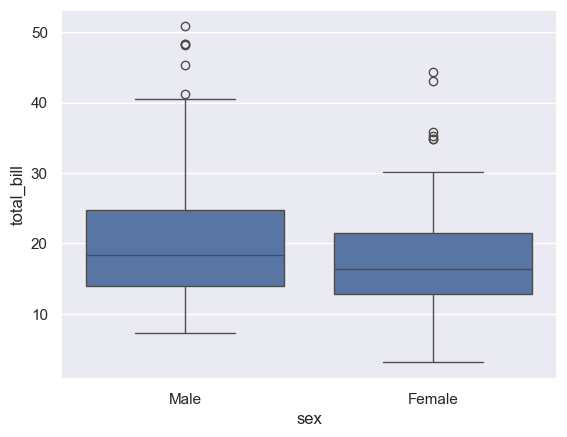

In [202]:
sns.boxplot(data=df, x="sex", y="total_bill")
plt.show()

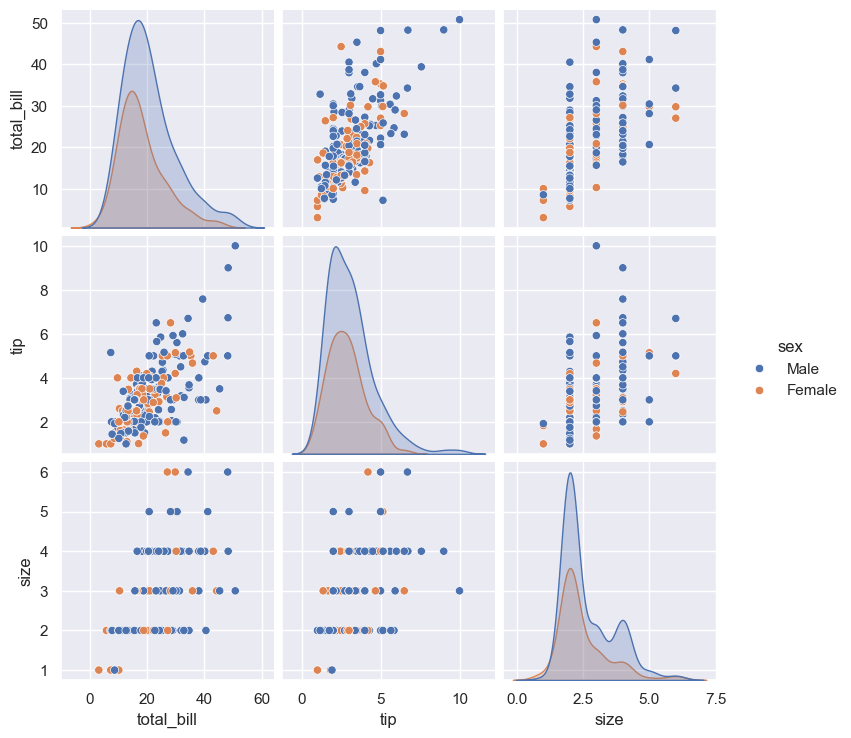

In [204]:
#ANALISIS MULTIVARIADO
sns.pairplot(df, hue="sex")
plt.show()

In [205]:
#ANALISIS EXPLORATORIO CASO PRACTICO
sns.set_style("darkgrid")
df = sns.load_dataset("tips")

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


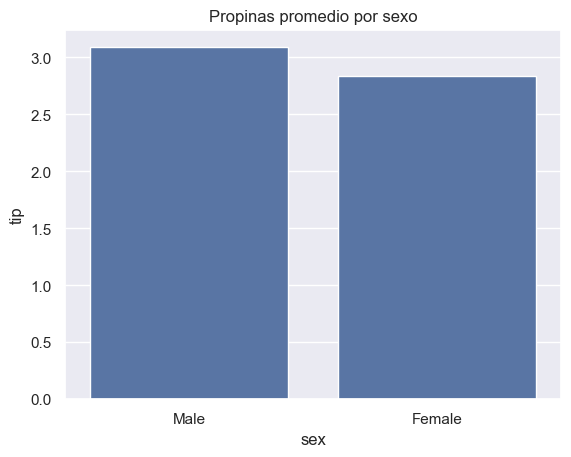

In [ ]:
#GRAFICO DE BARRAS DE PROPINA PROMEDIO POR SEXO
sns.barplot(data=df, x="sex", y="tip", errorbar=None)
plt.title("Propinas promedio por sexo")
plt.show()
# HOMBRES EN PROMEDIO PAGAN MÁS PROPINA PRIMER ANALISIS

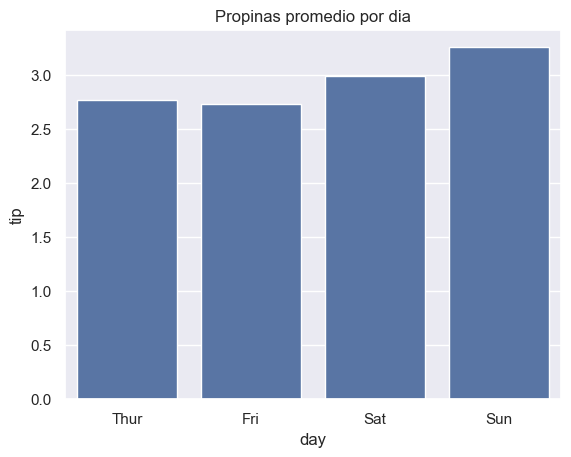

In [212]:
#PROPINAS PROMEDIO POR DIAS
sns.barplot(data=df, x="day", y="tip", errorbar=None)
plt.title("Propinas promedio por dia")
plt.show()
#LOS DOMINGOS SE PAGAN MAS PROPINA

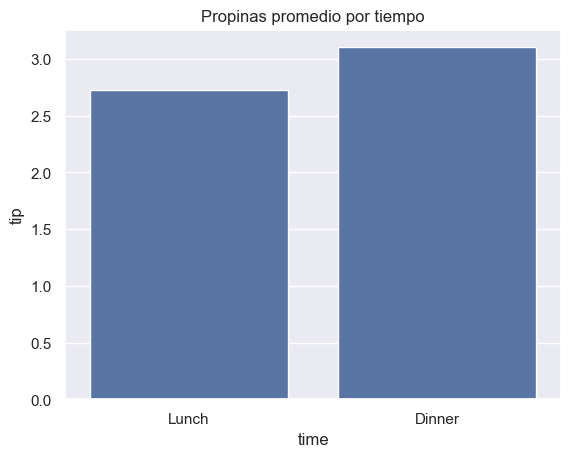

In [213]:
#PROPINAS PROMEDIO POR TIEMPO(CENA,ALMUERZO,DESAYUNO,ETC)
sns.barplot(data=df, x="time", y="tip", errorbar=None)
plt.title("Propinas promedio por tiempo")
plt.show()
#EN LA CENA SE PAGA PROPINA MAS EN PROMEDIO 

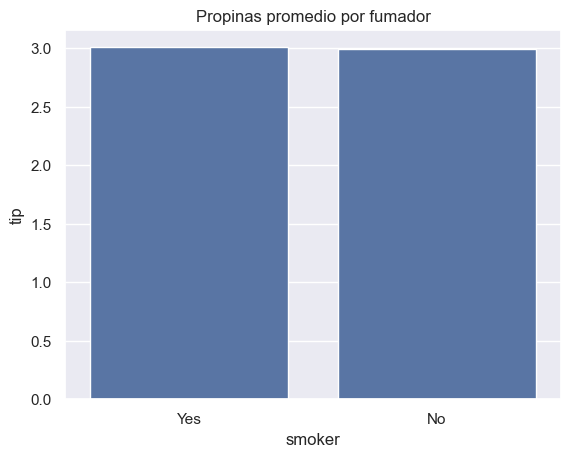

In [215]:
#PROPINAS PROMEDIO POR FUMADOR
sns.barplot(data=df, x="smoker", y="tip", errorbar= None)
plt.title("Propinas promedio por fumador")
plt.show()
#QUE SEA FUMADOR O NO NO AFECTA CUANTA PROPINA TE VA A DAR

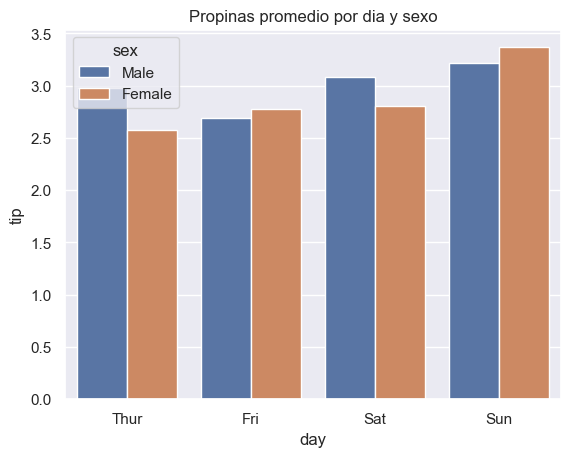

In [216]:
# GRAFICO DE BARRAS DE PROPINAS PROMEDIO POR DIA Y SEXO
sns.barplot(data=df, x="day", y="tip", hue="sex", errorbar= None)
plt.title("Propinas promedio por dia y sexo")
plt.show()
#

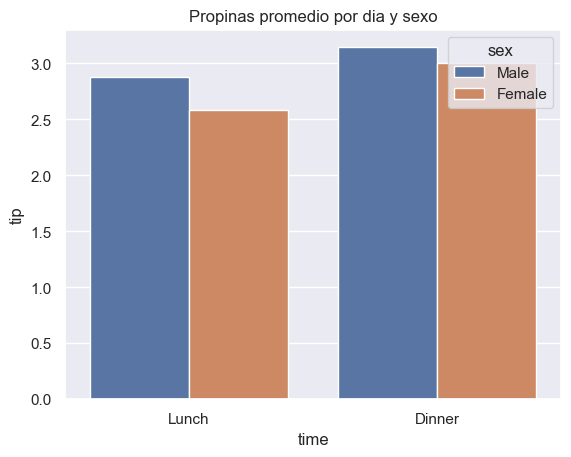

In [217]:
# GRAFICO DE BARRAS DE PROPINAS PROMEDIO POR TIEMPO Y SEXO
sns.barplot(data=df, x="time", y="tip", hue="sex", errorbar= None)
plt.title("Propinas promedio por dia y sexo")
plt.show()
#

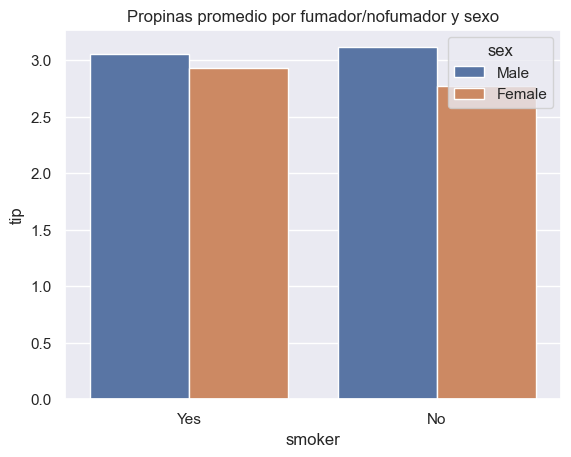

In [218]:
# GRAFICO DE BARRAS DE PROPINAS PROMEDIO POR TIEMPO Y SEXO
sns.barplot(data=df, x="smoker", y="tip", hue="sex", errorbar= None)
plt.title("Propinas promedio por fumador/nofumador y sexo")
plt.show()
#LOS HOMBRES FUMADORES Y NO FUMADORES DAN MAS PROPINA

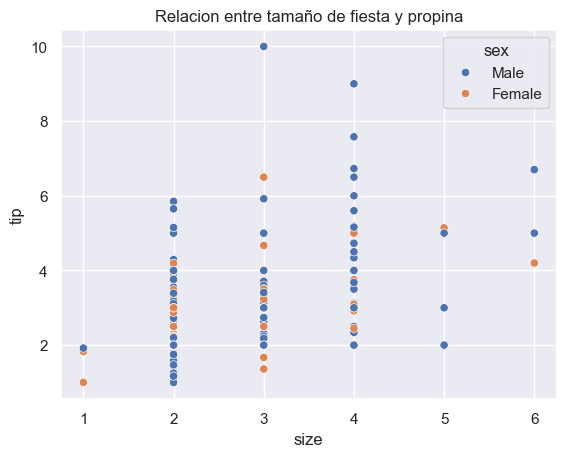

In [220]:
#GRAFICO DE DISPERSION ENTRE SIZE Y TIP

sns.scatterplot(data=df, x="size", y="tip", hue="sex")
plt.title("Relacion entre tamaño de fiesta y propina")
plt.show()

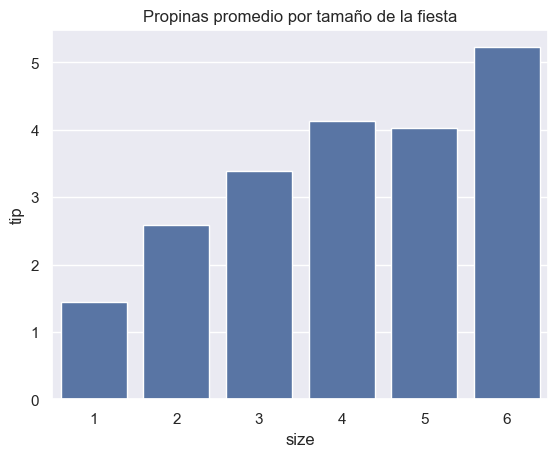

In [224]:
#GRAFICO DE BARRAS DE PROPINAS PROMEDIO POR TAMAÑO DE LA FIESTA
sns.barplot(data=df, x="size", y="tip", errorbar= None)
plt.title("Propinas promedio por tamaño de la fiesta")
plt.show()

In [225]:
#CALCULAR EL PORCENTAJE DE PROPINA Y LO AGREGAMOS AL DATAFRAME
df["tip_percentaje"] = (df["tip"]/df["total_bill"]) * 100
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentaje
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


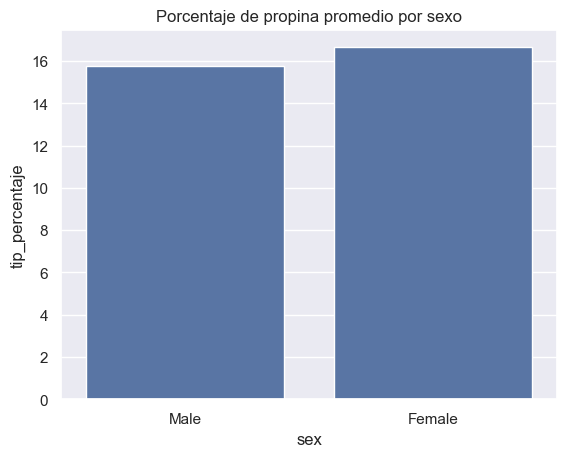

In [226]:
#GRAFICO DE BARRAS DE PORCENTAJE DE PROPINA PROMEDIO POR SEXO

sns.barplot(data=df, x="sex", y="tip_percentaje", errorbar= None)
plt.title("Porcentaje de propina promedio por sexo")
plt.show()

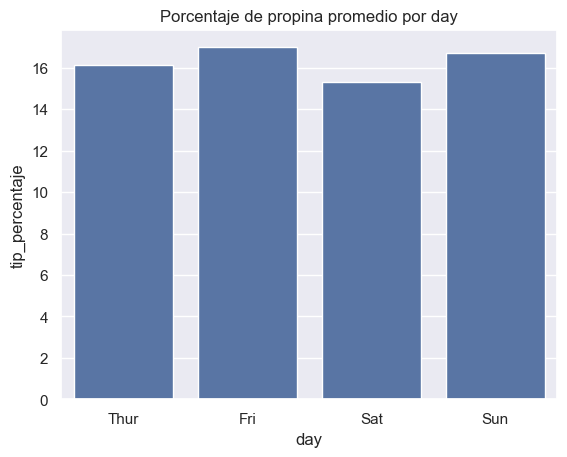

In [227]:
#GRAFICO DE PORCENTAJE DE PRPOINA PROMEDIO POR DIA

sns.barplot(data=df, x="day", y="tip_percentaje", errorbar= None)
plt.title("Porcentaje de propina promedio por day")
plt.show()

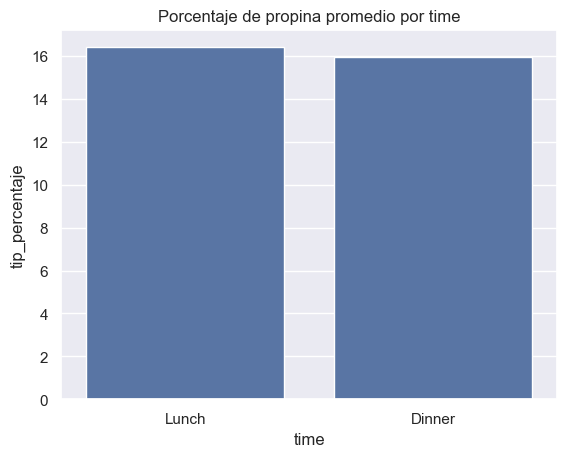

In [228]:
#GRAFICO DE PORCENTAJE DE PRPOINA PROMEDIO POR TIEMPO

sns.barplot(data=df, x="time", y="tip_percentaje", errorbar= None)
plt.title("Porcentaje de propina promedio por time")
plt.show()

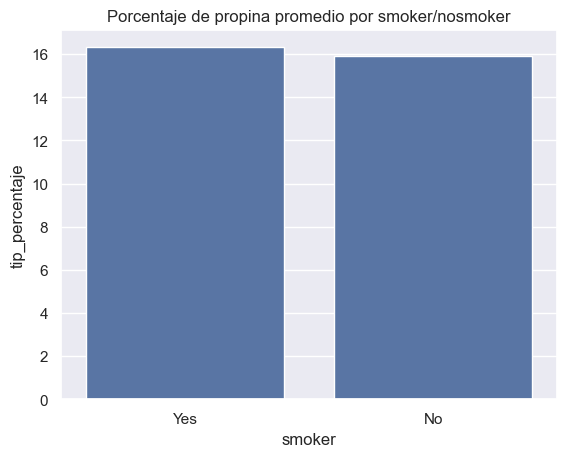

In [229]:
#GRAFICO DE PORCENTAJE DE PRPOINA PROMEDIO POR DIA

sns.barplot(data=df, x="smoker", y="tip_percentaje", errorbar= None)
plt.title("Porcentaje de propina promedio por smoker/nosmoker")
plt.show()

In [231]:
#DATA MINING : extracción de patrones, correlaciones etc.

#Dataset: conjunto de datos recolectados para el analisis
#Atributos : Características que describen los objetos
#Registro : conjunto de atributos que describren a un objeto en el dataset
#Clasificación: Asignación de una clase predefinidas en funcio a sus atributos
#Regresión : Predicción de un valor numérico en función de los atributos de un objeto
#Agrupamiento : Divisón de los objetos en grupos según sus atributos, de manera que los objetos sean similares

#PROCESO DE DATA-MINING (CRISP-DM) 

#CRIP-DM (Cross-Industry Standard Process for Data Mining) etapas:
    #1. Comprensión del negocio: Identificar y entender los objetivos del negocio y las necesidades
    #2. Comprensión de los datos: Explorar, describir y evaluar la calidad de los datos disponibles
    #3. Preparación de los datos: Limpieza, transformación, y pre-procesamiento para su uso en algoritmos de DM
    #4. Modelado: Selección y aplicación de algoritmos y tecnicas de DM para construir modelos que describan o predigan patrones
    #5. Evaluación: Validar y evaluar los modelos obtenidos para asegurar que cumplan con los objetivos del negocio
    #6. Implementación: Desplegar los modelos en la organización y aplicarlos en la toma de decisiones del negocio.
    

In [ ]:
#TÉCNICA PCA

ModuleNotFoundError: No module named 'sklearn'

In [234]:
#SEABORN 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [242]:
df = sns.load_dataset("iris")
df.iloc[:, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [238]:
pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df.iloc[:,:-1])
df_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

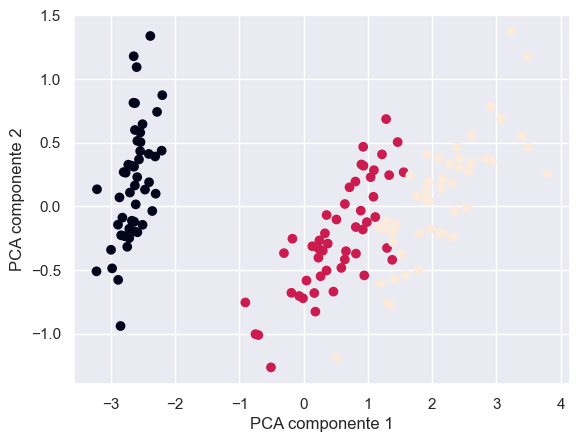

In [243]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=df["species"].astype("category").cat.codes)
plt.xlabel("PCA componente 1")
plt.ylabel("PCA componente 2")
plt.show()

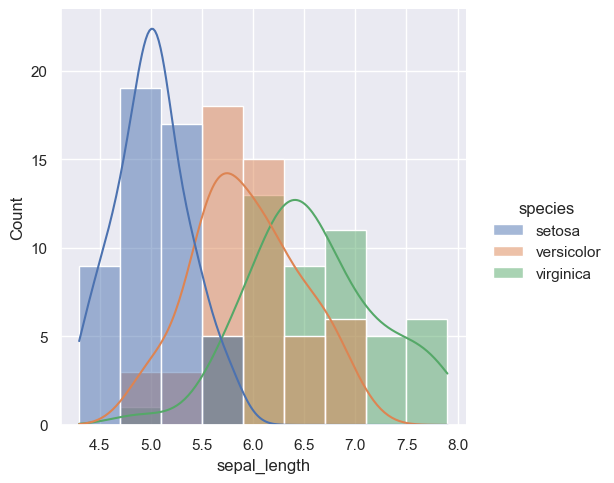

In [244]:
#TRANSFORMACIÓN DE VARIABLES
sns.displot(data=df, x="sepal_length", hue="species", kde= True)

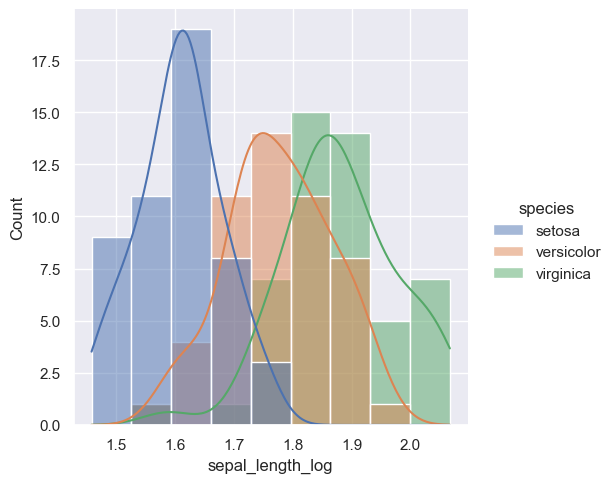

In [247]:
#TRANSFORMACIÓN LOGARITMICA
df["sepal_length_log"] = np.log(df["sepal_length"])
 
sns.displot(data=df, x="sepal_length_log", hue="species", kde= True)

In [ ]:
#NORMALIZACIÓN DE DATOS
